# Accuracy Vs. Refinement strength (Lambda)
Recreate figure 2 A - 
Accuracy rate for different refinement strengths \lambda

In [1]:
import os
print(os.getcwd()) #print working dir
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib import gridspec
import time

from importlib import reload
os.sys.path.insert(0, '../src/')
import analyze_utilities
reload(analyze_utilities)

%run ./result_summary.ipynb

output_path = '../results/figures'
is_plot_title = False
is_save_fig = True

# print(plt.style.available)
# print(plt.rcParams)
plt.style.use(['seaborn-darkgrid', 'seaborn-paper'])
label_size = 18
tick_size = 14
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=label_size)
plt.rc('axes', labelsize=label_size)
plt.rc('xtick', labelsize=tick_size)
plt.rc('ytick', labelsize=tick_size)

# import pathlib
# print(pathlib.Path('.').absolute())
# l = './../results/paper/figure_2_A/cifar_adv_diff_fix_natural'
# p = pathlib.Path(l)
# p.exists()

c:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml\notebooks
Loading paths from result_summary.ipynb


In [2]:
# 10000 samples
cifar_pgd_natural_diff_refinement = './../results/paper/figure_2_A/cifar_adv_diff_fix_natural'
cifar_natural_natural_diff_refinement = './../results/figure_2_A/paper/cifar_diff_fix_natural'
cifar_pgd_pgd_diff_refinement = './../results/paper/figure_2_A/cifar_adv_diff_fix'
cifar_natural_pgd_diff_refinement = './../results/figure_2_A/paper/cifar_diff_fix'

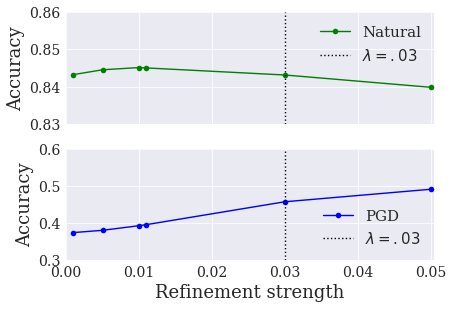

In [27]:
# results for pgd trained and natural trained models for different refinement strength (lambda [0, 0.05]):
# Names are formulated the following way cifar_{train type}_{attack_type}_df

# cifar_pgd_natural_df, _ = analyze_utilities.create_nml_vs_eps_df(cifar_pgd_natural_diff_refinement)
#     # cifar_natural_natural_df, _ = analyze_utilities.create_nml_vs_eps_df(cifar_natural_natural_diff_refinement)
#     # cifar_natural_pgd_df, _= analyze_utilities.create_nml_vs_eps_df((cifar_natural_pgd_diff_refinement))
# cifar_pgd_pgd_df, _ = analyze_utilities.create_nml_vs_eps_df(cifar_pgd_pgd_diff_refinement)


gs = gridspec.GridSpec(2, 1)
ax1 = plt.subplot(gs[0])

axes = plt.gca()
axes.set_xlim([0.0, 0.0505])
# axes.set_ylim([-0.53, 1.0])
ax1.plot(cifar_pgd_natural_df['eps'],cifar_pgd_natural_df['acc'], 'go-', label='Natural')
ax1.set_ylabel('Accuracy')
labels = [item.get_text() for item in ax1.get_xticklabels()]
empty_string_labels = [''] * len(labels)
ax1.set_xticklabels(empty_string_labels)
ax1.set_ylim([0.83, 0.86])
ax1.set_xlim([0.0, 0.0505])
ax1.axvline(x=0.03, color='k', linestyle='dotted', label='$\lambda=.03$')
ax1.legend(fontsize=15, ncol=1, loc=1)

# l2 = plt.plot(cifar_natural_natural_df['eps'],cifar_natural_natural_df['acc'], 'mo-')
# l3 = plt.plot(cifar_natural_pgd_df['eps'],cifar_natural_pgd_df['acc'], 'ro-')
ax2 = plt.subplot(gs[1])
ax2.plot(cifar_pgd_pgd_df['eps'],cifar_pgd_pgd_df['acc'], 'bo-', label='PGD')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Refinement strength')
ax2.set_ylim([0.3, 0.6])
ax2.set_xlim([0.0, 0.0505])
ax2.axvline(x=0.03, color='k', linestyle='dotted', label='$\lambda=.03$')


ax2.legend(fontsize=15, ncol=1, loc=4)

# purple_line = mlines.Line2D([], [], color='purple', markersize=15, label='Natural train, No attack')
# red_line = mlines.Line2D([], [], color='red', markersize=15, label='Natural train, PGD attack')



plt.savefig(os.path.join(output_path, 'fig_cifar_acc_vs_refinement_strength.pdf'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()


In [8]:
print(cifar_pgd_pgd_df)
print(cifar_pgd_natural_df)

      acc mean loss  std loss mean entropy    eps refine_iter  \
0  0.3742   3.07176   3.29567     0.200663  0.001           1   
1  0.3803   2.65604   2.91849     0.257525  0.005           1   
2  0.3927   2.21266   2.47298     0.339296   0.01           1   
6  0.3955   2.13842   2.39041     0.355881  0.011           1   
3   0.457   1.49731   1.29227     0.600455   0.03           1   
4  0.4906   1.46741  0.998813     0.676439   0.05           1   
5  0.4906   1.46741  0.998813     0.676439   0.08           1   

  refine_random_start refine_restart_num beta  \
0               False                  1    0   
1               False                  1    0   
2               False                  1    0   
6               False                  1    0   
3               False                  1    0   
4               False                  1    0   
5               False                  1    0   

                                              params params_fix_hash  \
0  {'batch_siz